# Initizlizations of Aspect Category System

In [1]:
import tensorflow as tf
import sys
import numpy as np
import gensim.models
import matplotlib.pyplot as plt
import pandas as pd   
from sklearn.manifold import TSNE
from gensim.models.word2vec import Word2Vec
from sklearn.preprocessing import scale
import logging
import random
import simplejson as json
import src.w2v_utils  as w2v_utils

setValidation = True  #to create a validation set or not
scaleVectors  = False #to scale word vectors or not
skipSections  = True  #to skip sections of codes for fast executions

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

# As usual, a bit of setup
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

xml_data_files = 'data/xml_files'
txt_data_files = 'data/txt_files'
csv_data_files = 'data/csv_files'

###Training Data###
training_Input_File       = '{}/ABSA16_Restaurants_Train_SB1_v2.xml'.format(xml_data_files)
training_output_File      = '{}/ABSA16_Restaurants_Train_SB1_v2.txt'.format(txt_data_files)
training_Unique_Sentences = '{}/ABSA16_Restaurants_Train_SB1_v2_Unique.txt'.format(txt_data_files)
w2v_utils.getTraining_setFile("Total Training Sentences with categories:",training_Input_File, training_output_File)
w2v_utils.getSentencesFile(training_Input_File, training_Unique_Sentences)

###Validation Data###
test_Input_File  = '{}/ABSA15_Restaurants_Test.xml'.format(xml_data_files)
test_output_File = '{}/ABSA15_Restaurants_Test.txt'.format(txt_data_files)
test_Unique_Sentences = '{}/ABSA15_Restaurants_Test_Unique.txt'.format(txt_data_files)
w2v_utils.getTraining_setFile("Total Validation Sentences with categories:",test_Input_File, test_output_File)
w2v_utils.getSentencesFile(test_Input_File, test_Unique_Sentences)

###Gold Standard Annotations###
gold_Input_File  = '{}/EN_REST_SB1_TEST.xml.gold'.format(xml_data_files)
gold_output_File = '{}/EN_REST_SB1_TEST_gold.txt'.format(txt_data_files)
gold_Unique_Sentences = '{}/EN_REST_SB1_TEST_gold_Unique.txt'.format(txt_data_files)
w2v_utils.getTraining_setFile("Total Gold Test set Sentences with categories:",gold_Input_File, gold_output_File)
w2v_utils.getSentencesFile(gold_Input_File, gold_Unique_Sentences)

Total Training Sentences with categories: 1708
Total Unique Sentences:  2000
Total Validation Sentences with categories: 582
Total Unique Sentences:  685
Total Gold Test set Sentences with categories: 587
Total Unique Sentences:  676


# Loading trained (yelp 5lac and training) Google word2vec Model 

In [2]:
#model = Word2Vec.load('TRAIN_MODEL')
model = Word2Vec.load('word2vec_model/400dm_by_5lac_yelp.model')
#print "Loading GoogleNews-vectors-negative300.bin model" 
#model = Word2Vec.load_word2vec_format('/home/nouman/Python codes/ABSA_code/GoogleNews-vectors-negative300.bin', binary=True) 
#print "Model loaded..."

2020-09-17 00:02:59,206 : INFO : loading Word2Vec object from word2vec_model/400dm_by_5lac_yelp.model
2020-09-17 00:02:59,475 : INFO : loading syn0 from word2vec_model/400dm_by_5lac_yelp.model.syn0.npy with mmap=None
2020-09-17 00:02:59,515 : INFO : loading syn1 from word2vec_model/400dm_by_5lac_yelp.model.syn1.npy with mmap=None
2020-09-17 00:02:59,554 : INFO : Model saved using code from earlier Gensim Version. Re-loading old model in a compatible way.
2020-09-17 00:02:59,555 : INFO : loading Word2Vec object from word2vec_model/400dm_by_5lac_yelp.model
2020-09-17 00:02:59,844 : INFO : loading syn0 from word2vec_model/400dm_by_5lac_yelp.model.syn0.npy with mmap=None
2020-09-17 00:02:59,891 : INFO : loading syn1 from word2vec_model/400dm_by_5lac_yelp.model.syn1.npy with mmap=None
2020-09-17 00:02:59,937 : INFO : setting ignored attribute syn0norm to None
2020-09-17 00:02:59,938 : INFO : setting ignored attribute cum_table to None
2020-09-17 00:02:59,939 : INFO : loaded word2vec_model/4

In [3]:
model.most_similar("good")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2020-09-17 00:03:00,041 : INFO : precomputing L2-norms of word weight vectors


[('decent', 0.6036416292190552),
 ('great', 0.5459213852882385),
 ('tasty', 0.5145878195762634),
 ('awesome', 0.43889498710632324),
 ('solid', 0.42857787013053894),
 ('excellent', 0.41170811653137207),
 ('tastey', 0.40314656496047974),
 ('average', 0.39288848638534546),
 ('yummy', 0.38846299052238464),
 ('amazing', 0.384460985660553)]

In [4]:
model.most_similar("bad")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('terrible', 0.5134795904159546),
 ('horrible', 0.474630206823349),
 ('awful', 0.4508820176124573),
 ('poor', 0.4300382733345032),
 ('soured', 0.39991259574890137),
 ('horrific', 0.38495567440986633),
 ('good', 0.3828938603401184),
 ('tainted', 0.38143378496170044),
 ('negative', 0.37759342789649963),
 ('lousy', 0.3643159866333008)]

# Loading training and test setences from files

In [5]:
training_output_File = '{}/ABSA16_Restaurants_Train_SB1_v2.txt'.format(txt_data_files)
test_output_File = '{}/ABSA15_Restaurants_Test.txt'.format(txt_data_files)
gold_output_File = '{}/EN_REST_SB1_TEST_gold.txt'.format(txt_data_files)
finalTrain = 'file'
train = pd.read_csv(training_output_File, header=None, delimiter="\t", quoting=3, names=['review', 'category'])
test  = pd.read_csv(gold_output_File, header=None, delimiter="\t", quoting=3, names=['review', 'category'])
train = w2v_utils.multiHotVectors(train, 'test_labels')
test  = w2v_utils.multiHotVectors(test, 'train_labels')
train.to_csv('{}/train.csv'.format(csv_data_files))
test.to_csv('{}/test.csv'.format(csv_data_files))

# Getting one Hot encodings of the labels

In [6]:
x_train = train["review"]
Y_train = np.array(w2v_utils.multiCategoryVectors(train, classes=12)).astype(int) #train["category"]
x_test  = test["review"]
Y_test  = np.array(w2v_utils.multiCategoryVectors(test, classes=12)).astype(int)  #test["category"]

print (train["review"][2], Y_train[2])
print (test["review"][2],  Y_test[2])


# preparing  data
x_train,Y_train,x_val,Y_val =  w2v_utils.splitDataset(x_train, Y_train, split=0.85) 

####################################### CLEANING REVIEWS ###############################################################
print ("Cleaning sentences from training set...")
x_train = w2v_utils.clean(x_train, True)
x_val = w2v_utils.clean(x_val,True)
x_test = w2v_utils.clean(x_test,True)
print ("Training Set:",len(x_train), "Validation Set:",len(x_val), "Gold Set:",len(x_test))#,"Test Set:",len(x_test) 


Hot encoded vectors shape:  (1708, 12)
Hot encoded vectors shape:  (587, 12)
They never brought us complimentary noodles, ignored repeated requests for sugar, and threw our dishes on the table. [0 0 0 0 0 0 0 0 0 0 0 1]
Not the biggest portions but adequate. [0 0 0 0 0 0 1 0 0 0 0 0]
Cleaning sentences from training set...
Training Set: 1452 Validation Set: 256 Gold Set: 587


# Sentence Compression Method

In [7]:
######## getting sentence vectors
print ("Process of word to vector conversion initiated!")

#Build word vector for training set by using the average value of all word vectors in the tweet, then scale
def buildWordVector(text, size, debug = False):
    sentWords = len(text)  
    #print (text, "Sentence Words:",sentWords)
    if (sentWords == 0):
        print ("Empty Sentence" )
        #return np.zeros(size*2).reshape((1, size*2))
        return np.zeros(size).reshape((1, size))

    count = 0.
    vecSum      = np.zeros(size).reshape((1, size))
    vecMin      = np.zeros(size).reshape((1, size))
    avgvecSum   = np.zeros(size).reshape((1, size))
    avgvecMin   = np.zeros(size).reshape((1, size))
    NAV_L1      = np.zeros(size).reshape((1, size))
    NAV_L2      = np.zeros(size).reshape((1, size))
    L1_SOM      = np.zeros(size).reshape((1, size))
    L2_SOM      = np.zeros(size).reshape((1, size))
    mul_wordVec = np.zeros(size).reshape((1, size))
    
    #Loop started!!
    for word in text:
        try:
            wordVector = model[word].reshape((1, size))
            #vecSum = vecSum + wordVector
            if count != 0:
                vecSum      =  vecSum+wordVector
                vecMin      =  vecMin+wordVector
                mul_wordVec = mul_wordVec*wordVector
            else:
                vecSum      =  wordVector
                vecMin      =  wordVector
                mul_wordVec =  wordVector
                
            count  = count+1.
            
        except KeyError:
            if debug:
                print ("not found! ",  word)
                count += 1.
            continue
    #Loop ends!!
    
    if count != 0:
        ###### Multiply word vectors
        mul_wordVec = mul_wordVec/1
        
        ###### Sum and Subract ######
        vecSum  = vecSum/1
        vecMin  = vecMin/1
        avgvecSum = vecSum #SOW
        avgvecMin = vecMin #DOW
        ##concatenating both sum and subtraction of word vectors
        con_vecSum_vecMin = np.hstack((vecSum,vecMin)) #CONC-Vec
        
        
        ###### Average Sum and Subract ######      
        avgvecSum = avgvecSum/count #Avg-SUM
        avgvecMin = avgvecMin/count #Avg-SUB
        
        ###### Normalized Average Sum and Subract ######        
        NAV_L1 = avgvecSum/np.linalg.norm(avgvecSum,ord=1)    #L1-NAV (Sum)
        NAV_L2 = avgvecSum/np.linalg.norm(avgvecSum, axis=1)  #L2-NAV (Sum)
        
        NAV_L1_Sub = avgvecMin/np.linalg.norm(avgvecMin,ord=1)    #L1-NAV (Sub)
        NAV_L2_Sub = avgvecMin/np.linalg.norm(avgvecMin, axis=1)  #L2-NAV (Sub)
        
        ############ Normalized Word Vectors #############
        ###### L1-SOM ######
        L1_SOM = vecSum/np.linalg.norm(vecSum,ord=1)   #L1-NV (Sum)
        L2_SOM = vecSum/np.linalg.norm(vecSum, axis=1) #L2-NV (Sum)
        
        L1_SOM_Sub = vecMin/np.linalg.norm(vecSum,ord=1)   #L1-NV (Sub)
        L2_SOM_Sub = vecMin/np.linalg.norm(vecSum, axis=1) #L2-NV (Sub)

    return vecSum

######## Converting training, validation and test sentences into vectors
x_train = np.concatenate([buildWordVector(sentence, model.layer1_size, debug = False) for sentence in x_train])
if(scaleVectors):
    x_train = scale(x_train)
print ("Training set Sentences word vector dimensions: \n",x_train.shape)

if (setValidation):
    x_val = np.concatenate([buildWordVector(sentence, model.layer1_size, debug = False) for sentence in x_val]) 
    if(scaleVectors):
        x_val = scale(x_val)
    print ("Validation set Sentences word vector dimensions: \n",x_val.shape)
    
x_test = np.concatenate([buildWordVector(sentence, model.layer1_size, debug = False) for sentence in x_test])
if(scaleVectors):
    x_test = scale(x_test)
print ("Gold Sentences word vector dimensions: \n",x_test.shape)

Process of word to vector conversion initiated!
Empty Sentence


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Training set Sentences word vector dimensions: 
 (1452, 400)
Empty Sentence
Validation set Sentences word vector dimensions: 
 (256, 400)
Gold Sentences word vector dimensions: 
 (587, 400)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:88: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:93: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).


# Plotting Setence vectors

In [8]:
if skipSections:
    print ("TSNE graphical representation of vectors loading...")
    #Plot Word Vectors in 2-dimensional space
    ts = TSNE(2)
    reduced_trained_vectors = ts.fit_transform(x_train)
    print ("Training Sentences REDUCED word vector dimensions: \n",reduced_trained_vectors.shape)

    if (setValidation):
        reduced_validation_vectors = ts.fit_transform(x_val)
        print ("Validation Sentences REDUCED word vector dimensions: \n",reduced_validation_vectors.shape)

    reduced_gold_vectors = ts.fit_transform(x_test)
    print ("Gold Sentences REDUCED word vector dimensions: \n",reduced_gold_vectors.shape)

TSNE graphical representation of vectors loading...
Training Sentences REDUCED word vector dimensions: 
 (1452, 2)
Validation Sentences REDUCED word vector dimensions: 
 (256, 2)
Gold Sentences REDUCED word vector dimensions: 
 (587, 2)


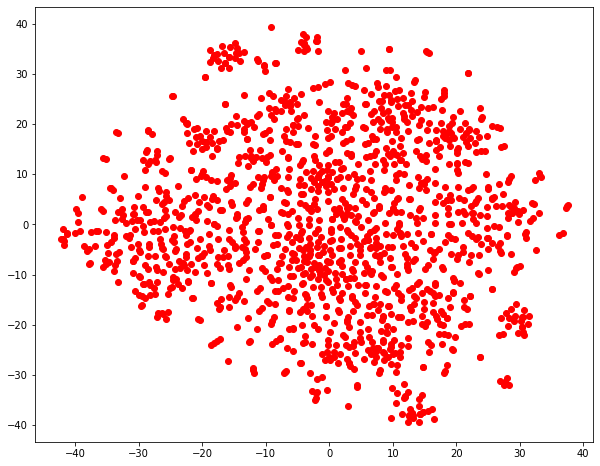

In [9]:
if skipSections:
    #color points by word group to see if Word2Vec can separate them
    for i in range(len(reduced_trained_vectors)):
        if i < len(x_train):
            color = 'r'
        plt.plot(reduced_trained_vectors[i,0], reduced_trained_vectors[i,1], marker='o', color=color, markersize=6)

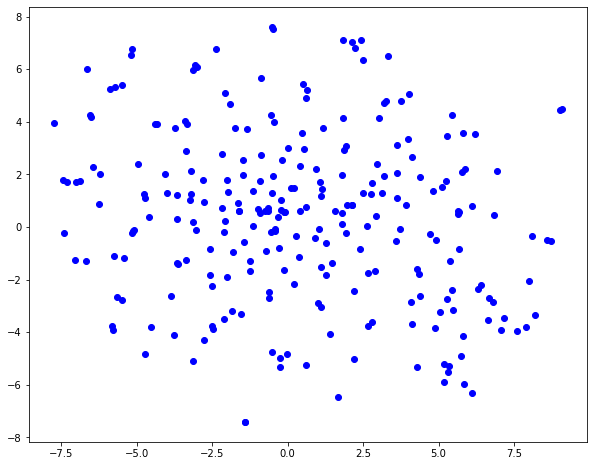

In [10]:
if skipSections:
    if (setValidation):
        #color points by word group to see if Word2Vec can separate them
        for i in range(len(reduced_validation_vectors)):
            if i < len(x_val):
                color = 'b'
            plt.plot(reduced_validation_vectors[i,0], reduced_validation_vectors[i,1], marker='o', color=color, markersize=6)

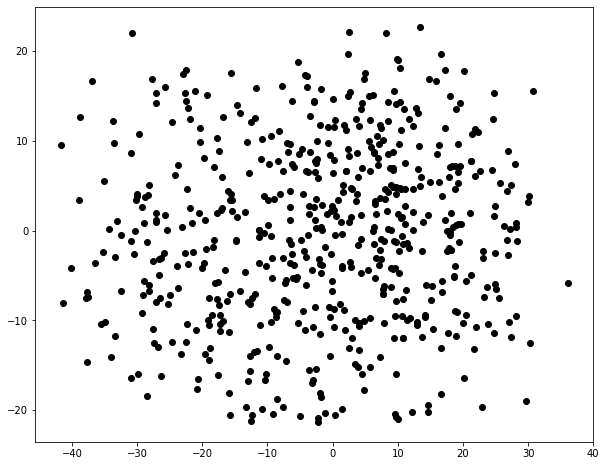

In [11]:
if skipSections:    
    #color points by word group to see if Word2Vec can separate them
    for i in range(len(reduced_gold_vectors)):
        if i < len(x_test):
            color = 'k'
        plt.plot(reduced_trained_vectors[i,0], reduced_gold_vectors[i,1], marker='o', color=color, markersize=6)

# Converting x_ and y_ sets for training and testing

In [12]:
#Entities   = np.array(['FOOD', 'SERVICE', 'DRINKS', 'AMBIENCE', 'LOCATION', 'RESTAURANT'])
#Attributes = np.array(['GENERAL', 'QUALITY', 'STYLE_OPTIONS', 'MISCELLANEOUS', 'PRICES'])

############################### Preparing Data with One Hot #######################################
X_train = x_train 
y_train = Y_train
print ("Training Data: ",X_train.shape, y_train.shape)

###############################Preparing Validation Data
X_val = x_val
y_val = Y_val
print ("Validation Data: ",X_val.shape, y_val.shape)

###############################Preparing Test Gold Data
X_test = x_test
y_test = Y_test
print ("Gold Test Data: ", X_test.shape,y_test.shape)

y_train[0], y_val[0], y_test[0]

Training Data:  (1452, 400) (1452, 12)
Validation Data:  (256, 400) (256, 12)
Gold Test Data:  (587, 400) (587, 12)


(array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]))

# Category Distribution Chart

[226  20  46  30  82 681 128  28 421  97  80 419] [ 57   3  21  12  22 226  48  13 142  33  21 145]
Total number of Training set Categories:  12
Total number of Training set Categories:  11


Text(0.5, 0, 'Number of Aspect categories in Reviews')

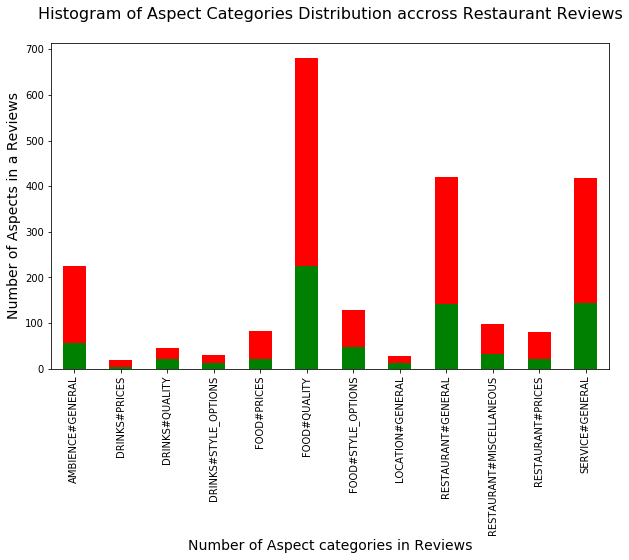

In [13]:
#Frequencies of categories
categories = np.array(['AMBIENCE#GENERAL','DRINKS#PRICES','DRINKS#QUALITY','DRINKS#STYLE_OPTIONS','FOOD#PRICES','FOOD#QUALITY','FOOD#STYLE_OPTIONS','LOCATION#GENERAL','RESTAURANT#GENERAL','RESTAURANT#MISCELLANEOUS','RESTAURANT#PRICES','SERVICE#GENERAL'])
y_tr  = np.nonzero(y_train)[1]
y_tr  = np.bincount(y_tr)

y_va  = np.nonzero(y_val)[1]
y_va  = np.bincount(y_va)

y_te  = np.nonzero(y_test)[1]
y_te  =  np.bincount(y_te)

trainCat = y_tr+y_va
testCat  = y_te
print (trainCat, testCat)

#Categories in training set
trainFreq = pd.Series(trainCat, index=[trainCat])
print ("Total number of Training set Categories: ", trainFreq.value_counts().size)
trainFreq = pd.Series(trainFreq.get_values(),  index=categories)
#trainFreq.plot(kind='pie',title='Training Set Categories', figsize=(10, 10))
gra_1 = trainFreq.plot(lw=2, kind='bar', stacked=True, figsize=(10, 8), color='r',fontsize=10)

#Categories in test set
testFreq = pd.Series(testCat, index=[testCat])
print ("Total number of Training set Categories: ", testFreq.value_counts().size)
testFreq = pd.Series(testFreq.values,  index=categories)
#testFreq.plot(kind='pie', title='Test Set Categories', figsize=(10, 10))
gra_1 = testFreq.plot(lw=2, kind='bar', stacked=True,figsize=(10, 6), color='g', fontsize=10)

gra_1.set_title('Histogram of Aspect Categories Distribution accross Restaurant Reviews\n', fontsize=16)
gra_1.set_ylabel("Number of Aspects in a Reviews", fontsize=14)
gra_1.set_xlabel("Number of Aspect categories in Reviews", fontsize=14)

# Nueral Network Architecture

In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


2020-09-17 00:03:14,834 : WARNING : From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/compat/v2_compat.py:88: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
# Parameters
training_epochs = 100
batch_size = 80
display_step = 5
batch = tf.Variable(0, trainable=False)
regualarization =  0.001

# Network Parameters
n_hidden_1 = 300 # 1st layer num features
n_hidden_2 = 250 # 2nd layer num features

n_input = X_test.shape[1] #model.layer1_size # Vector input (sentence shape: 30*10)
n_classes = 12 # Sentence Category detection total classes (0-11 categories)

#History storing variables for plots
loss_history = []
train_acc_history = []
val_acc_history = []

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


# Create model
def multilayer_perceptron(_X, _weights, _biases):
    layer_1 = tf.nn.relu(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1'])) 
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, _weights['h2']), _biases['b2'])) 
    return tf.matmul(layer_2, weights['out']) + biases['out']  


# Store layers weight & bias
reset = True #if false then weights will not be initialized randomly 
if  (reset == True):
    w2v_utils.resetModel()#delete old weights
    
weights = {
    'h1':  w2v_utils.weight_variable(n_input, n_hidden_1,    filename="params/weights_h1.txt",  boolean=reset),
    'h2':  w2v_utils.weight_variable(n_hidden_1, n_hidden_2, filename="params/weights_h2.txt",  boolean=reset),
    'out': w2v_utils.weight_variable(n_hidden_2, n_classes,  filename="params/weights_out.txt", boolean=reset) 
}

biases = {
    'b1': w2v_utils.bias_variable([n_hidden_1], filename="params/biases_b1.txt", boolean=reset),
    'b2': w2v_utils.bias_variable([n_hidden_2], filename="params/biases_b2.txt", boolean=reset),
    'out': w2v_utils.bias_variable([n_classes], filename="params/biases_out.txt", boolean=reset)
}
    
# Define loss and optimizer
#learning rate
#Optimizer: set up a variable that's incremented once per batch and
# controls the learning rate decay.
learning_rate = tf.train.exponential_decay(
  0.003,           # Base learning rate. #0.002
  batch * batch_size,  # Current index into the dataset.
  X_train.shape[0],    # Decay step.
  0.96,                # Decay rate.
  staircase=True)


# Construct model
pred = tf.nn.sigmoid(multilayer_perceptron(x, weights, biases))

#L2 regularization
l2_loss = tf.add_n([tf.nn.l2_loss(v) for v in tf.trainable_variables()])
    
#Softmax loss
cost = cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))  #labels=..., logits=.

#Total_cost
cost = cost+ (regualarization*0.5*l2_loss)

# Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost,global_step=batch)

# Initializing the variables
init = tf.initialize_all_variables()

print ("Network Initialized!")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2020-09-17 00:03:14,908 : WARNING : From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1635: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



2020-09-17 00:03:14,935 : WARNING : From <ipython-input-15-fc70e274bf9a>:68: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:
Use `tf.global_variables_initializer` instead.


2020-09-17 00:03:15,053 : WARNING : From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/util/tf_should_use.py:235: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Network Initialized!


# Training

In [16]:
from __future__ import division
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

LoadTrainedModel = False

truePred=0
falsePred=0
TP = 0
FN = 0
FP = 0
TN = 0

###http://stackoverflow.com/questions/33759623/tensorflow-how-to-restore-a-previously-saved-model-python
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    if(LoadTrainedModel == False):
        data = list(zip(X_train,y_train))
        data = np.array(data)
        data_size = len(data)
        num_batches_per_epoch = int(len(data)/batch_size) + 1
        for epoch in range(training_epochs):
            avg_cost = 0.
            # Shuffle the data at each epoch
            shuffle_indices = np.random.permutation(np.arange(data_size))
            shuffled_data = data[shuffle_indices]
            for batch_num in range(num_batches_per_epoch):
                start_index = batch_num * batch_size
                end_index = min((batch_num + 1) * batch_size, data_size)
                sample = list(zip(*shuffled_data[start_index:end_index]))
                #picking up random batches from training set of specific size
                batch_xs, batch_ys = sample[0],sample[1]
                # Fit training using batch data
                sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
                # Compute average loss
                avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/num_batches_per_epoch
            #append loss
            #loss_history.append(avg_cost)

            # Display logs per epoch step
            if (epoch % display_step == 0):           
                correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))            
                # Calculate training  accuracy
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                trainAccuracy = accuracy.eval({x: X_train, y: y_train})
                train_acc_history.append(trainAccuracy)  
                loss_history.append(avg_cost)
                # Calculate validation  accuracy
                valAccuracy = accuracy.eval({x: X_val, y: y_val})
                val_acc_history.append(valAccuracy) 
                print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost), "train=",trainAccuracy,"val=", valAccuracy)
        print ("Optimization Finished!\n")

        w2v_utils.resetModel()#delete old weights
        # code save numpy arrays
        np.savetxt("params/weights_h1.txt", weights['h1'].eval())
        np.savetxt("params/weights_h2.txt", weights['h2'].eval()) 
        np.savetxt("params/weights_out.txt", weights['out'].eval()) 
        np.savetxt("params/biases_b1.txt",biases['b1'].eval())
        np.savetxt("params/biases_b2.txt",biases['b2'].eval())
        np.savetxt("params/biases_out.txt",biases['out'].eval())

        print ("Model Parameters Shape:")
        print( weights['h1'].eval().shape,  weights['h2'].eval().shape, weights['out'].eval().shape)
        print (biases['b1'].eval().shape, biases['b2'].eval().shape, biases['out'].eval().shape)

        predictedlabel = np.zeros(y_test.shape)
        corrPred=0
        # Evaluation of  model
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)) 
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        w2v_utils.do_eval("","","", sess, correct_prediction, accuracy, pred, X_test, y_test, x, y)

        #Test
        #'''
        for i in range(len(X_test)): #X_test
            if (i<=len(y_test)):    
                check,predictedlabel[i], TP_, FP_, TN_, FN_ = w2v_utils.do_eval(test["review"][i],i,"Accuracy of Test set Results: ", sess, correct_prediction, 
                                                                 accuracy, pred, X_test[i:i+1], y_test[i:i+1], 
                                                                 x, y, True, 0.785, debug=False)
                TP = TP+TP_
                FP = FP+FP_
                TN = TN+TN_
                FN = FN+FN_

                if check == True:
                    truePred = truePred+1
                else:
                    falsePred = falsePred+1
        #'''
    else:
        predictedlabel = np.zeros(y_test.shape)
        corrPred=0
        # Evaluation of  model
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)) 
        
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        w2v_utils.do_eval("","","",  sess, correct_prediction, accuracy, pred, X_test, y_test, x, y) #test set

        #Test
        #'''
        for i in range(len(X_test)): #X_test
            if (i<=len(y_test)):    
                check,predictedlabel[i], TP_, FP_, TN_, FN_ = w2v_utils.do_eval(test["review"][i],i,"Accuracy of Test set Results: ", sess, correct_prediction, 
                                                                 accuracy, pred, X_test[i:i+1], y_test[i:i+1], 
                                                                 x, y, True, 0.785, debug=False)
                TP = TP+TP_
                FP = FP+FP_
                TN = TN+TN_
                FN = FN+FN_

                if check == True:
                    truePred = truePred+1
                else:
                    falsePred = falsePred+1
        #'''

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Epoch: 0001 cost= 3.060604735 train= 0.5406336 val= 0.609375
Epoch: 0006 cost= 2.699107785 train= 0.4311295 val= 0.48828125
Epoch: 0011 cost= 2.516284403 train= 0.7011019 val= 0.7265625
Epoch: 0016 cost= 2.425146479 train= 0.7796143 val= 0.73828125
Epoch: 0021 cost= 2.400285219 train= 0.78099173 val= 0.734375
Epoch: 0026 cost= 2.394809761 train= 0.7878788 val= 0.74609375
Epoch: 0031 cost= 2.368382768 train= 0.7858127 val= 0.73046875
Epoch: 0036 cost= 2.346985359 train= 0.78650135 val= 0.73046875
Epoch: 0041 cost= 2.345316040 train= 0.7892562 val= 0.72265625
Epoch: 0046 cost= 2.362979914 train= 0.79683197 val= 0.734375
Epoch: 0051 cost= 2.367731157 train= 0.79407716 val= 0.71875
Epoch: 0056 cost= 2.350658768 train= 0.79820937 val= 0.7265625
Epoch: 0061 cost= 2.353330336 train= 0.7988981 val= 0.734375
Epoch: 0066 cost= 2.350138049 train= 0.79683197 val= 0.7265625
Epoch: 0071 cost= 2.351807105 train= 0.8057851 val= 0.7265625
Epoch: 0076 cost= 2.336087992 train= 0.8057851 val= 0.7265625
Ep

# Test Accuracy

In [17]:
total = np.nonzero(y_test)

#print "\n<------------Correct and inccorrect predictions------------>"
print ("TP:",TP,"FP:",FP)
print ("FN:",FN,"TN:",TN)

precision =  TP/(TP+FP)
recall    =  TP/(TP+FN)
F1 = 2*(precision*recall)/(precision+recall)
F1_ = (1 + 1 ** 2) * precision * recall / ((precision * 1 ** 2) + recall) if precision > 0 and recall > 0 else 0.
print ("Precision:",precision)
print ("Recall   :",recall)
print ("F1 calculated by me!:",F1)
print ("F1 calculated by AUEB:",F1_)
print ("F1 micro averaging Library function:",(f1_score(y_test, predictedlabel, average='micro'))) #test

y_test =  y_test.astype(int)
predictedlabel = predictedlabel.astype(int)

labels = np.array(['AMBIENCE#GENERAL','DRINKS#PRICES','DRINKS#QUALITY','DRINKS#STYLE_OPTIONS','FOOD#PRICES','FOOD#QUALITY','FOOD#STYLE_OPTIONS','LOCATION#GENERAL','RESTAURANT#GENERAL','RESTAURANT#MISCELLANEOUS','RESTAURANT#PRICES','SERVICE#GENERAL'])
scores = (classification_report(y_test, predictedlabel, target_names=labels)) #test

print ("\n-------------------------Classification report:------------------------ \n\n", scores[:870])

TP: 545 FP: 184
FN: 198 TN: 0
Precision: 0.747599451303155
Recall   : 0.7335127860026918
F1 calculated by me!: 0.7404891304347827
F1 calculated by AUEB: 0.7404891304347827
F1 micro averaging Library function: 0.7404891304347827

-------------------------Classification report:------------------------ 

                           precision    recall  f1-score   support

        AMBIENCE#GENERAL       0.76      0.88      0.81        57
           DRINKS#PRICES       0.00      0.00      0.00         3
          DRINKS#QUALITY       0.50      0.29      0.36        21
    DRINKS#STYLE_OPTIONS       0.67      0.50      0.57        12
             FOOD#PRICES       0.50      0.45      0.48        22
            FOOD#QUALITY       0.80      0.88      0.84       226
      FOOD#STYLE_OPTIONS       0.62      0.48      0.54        48
        LOCATION#GENERAL       0.00      0.00      0.00        13
      RESTAURANT#GENERAL       0.77      0.74      0.75       142
RESTAURANT#MISCELLANEOUS       0.38

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training and Validation curves

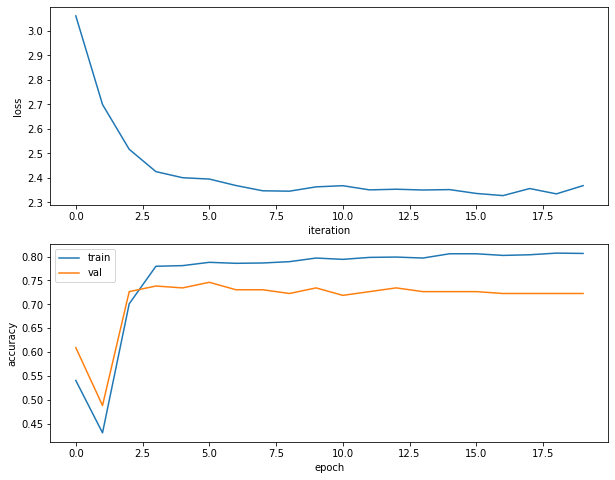

In [18]:
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
#print train_acc_history
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()